In [6]:
import urllib
import os
import operator
import pathlib
import requests
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point
%matplotlib inline

In [8]:
DATA_ROOT = '../data/'
FIGURES_ROOT = '../figures/crime'

READDIR_ROOT = os.path.join(DATA_ROOT, 'raw')
WRITEDIR_ROOT = os.path.join(DATA_ROOT, 'interim/crime')

readfile_crime = os.path.join(READDIR_ROOT, 'crime/crime-incidents.csv')

readfile_sam = os.path.join(READDIR_ROOT, 'boston/sam-addresses.csv')
readfile_zipshapes = os.path.join(READDIR_ROOT, 'shapefile/zipcodes/ZIP_Codes.shp')
readfile_cityshape = os.path.join(READDIR_ROOT, 'shapefile/city-boundary/City_of_Boston_Boundary.shp')
readfile_streetshapes = os.path.join(READDIR_ROOT, 'shapefile/street-segments/Boston_Street_Segments.shp')
readfile_tractshapes = os.path.join(READDIR_ROOT, 'shapefile/census-tracts/Census_2010_Tracts.shp')
readfile_hoodshapes = os.path.join(READDIR_ROOT, 'shapefile/boston-neighborhoods/Boston_Neighborhoods.shp')
readfile_zonesubshapes = os.path.join(READDIR_ROOT, 'shapefile/zoning-subdistricts/Zoning_Subdistricts.shp')

print(
    'readfile paths for datasets used in this notebook are:\n\t{}\n\t{}\n\t{}'.format(
        readfile_crime, readfile_sam, readfile_zipshapes, WRITEDIR_ROOT
    )
)


readfile paths for datasets used in this notebook are:
	../data/raw\crime/crime-incidents.csv
	../data/raw\boston/sam-addresses.csv
	../data/raw\shapefile/zipcodes/ZIP_Codes.shp


In [9]:
DATA_ROOT = '../data/'
DATA_DIR = os.path.join(DATA_ROOT, 'raw/boston')
readfile_prop_viol = os.path.join(DATA_DIR, 'property-violations.csv')

In [10]:
df_prop_viol = pd.read_csv(readfile_liquor)
df_prop_viol.head(3)

,ticket_no,status_dttm,status,code,value,description,stno,sthigh,street,suffix,city,state,zip,sam_id,latitude,longitude,location
0,V471523,2019-11-05 13:29:04,Open,105.1,NaN,Failure to Obtain Permit,23,NaN,Tonawanda,ST,Dorchester,MA,02124,136170,42.299220,-71.066060,"(42.299220000045, -71.0660600013744)"
1,V471519,2019-11-05 13:10:42,Open,3307.1,NaN,Protection of Adj. Property,7,NaN,Parker,ST,Charlestown,MA,02129,107776,42.383903,-71.078772,"(42.3839029996446, -71.078772001075)"
2,V471500,2019-11-05 12:28:53,Open,116,NaN,Unsafe Structures,85,NaN,Newton,ST,Roxbury,MA,02118,102645,42.340970,-71.075800,"(42.3409700000129, -71.0758000015981)"


In [12]:
df_prop_viol.dtypes

ticket_no       object
status_dttm     object
status          object
code            object
value          float64
description     object
stno            object
sthigh          object
street          object
suffix          object
city            object
state           object
zip             object
sam_id           int64
latitude       float64
longitude      float64
location        object
dtype: object

In [15]:
#Map plot prep

# read in SAM address data and related shapefiles
df_crime = pd.read_csv(readfile_crime, dtype=str)
df_sam = pd.read_csv(readfile_sam, dtype=str)
gdf_zips = gpd.read_file(readfile_zipshapes)
gdf_boston = gpd.read_file(readfile_cityshape)
gdf_streets = gpd.read_file(readfile_streetshapes)
gdf_tracts = gpd.read_file(readfile_tractshapes)
gdf_hoods = gpd.read_file(readfile_hoodshapes)
gdf_zonesubs = gpd.read_file(readfile_zonesubshapes)

# convert SAM data lat/lon values to floats
df_sam[['X', 'Y']] = df_sam[['X', 'Y']].astype(float)
# convert crime data lat/lon values to floats
df_crime[['Lat', 'Long']] = df_crime[['Lat', 'Long']].astype(float)

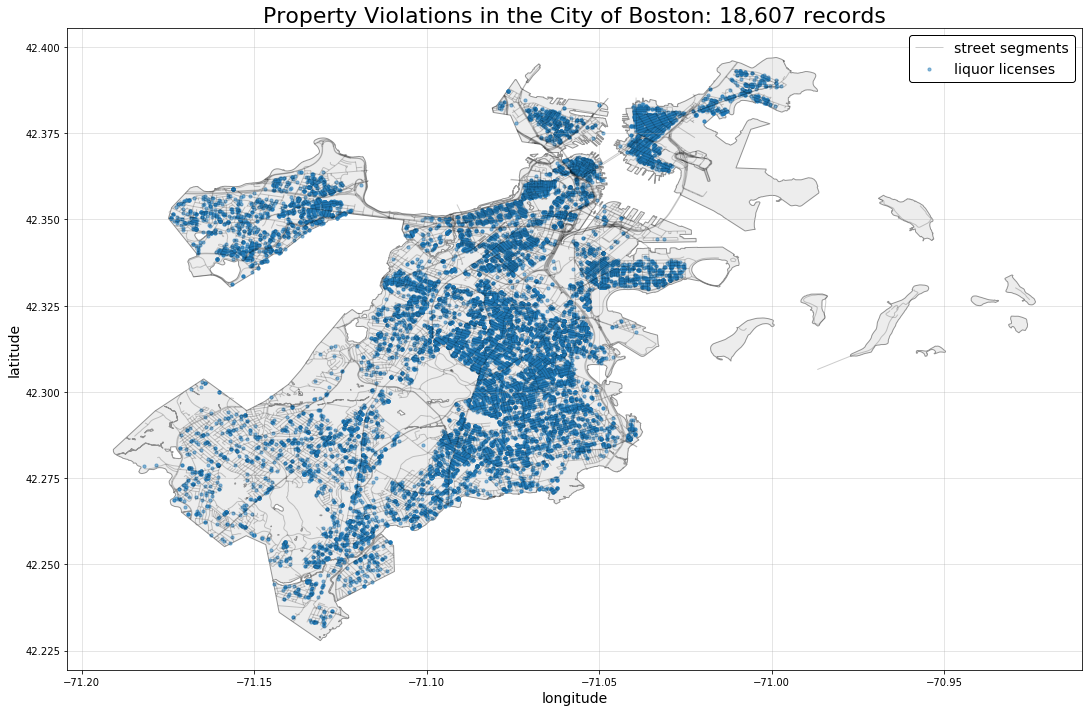

In [18]:
# plot unique SAM records with city boundary and street segments overlays 
fig, ax = plt.subplots(figsize=(16,10))
gdf_boston.plot(ax=ax, color='lightgray', edgecolor='k', alpha=0.4)
gdf_streets.plot(ax=ax, color='k', linewidth=1, alpha=0.2, label='street segments')
plt.title(
    'Property Violations in the City of Boston: 18,607 records',
    fontsize=22
)
plt.scatter(
    #df_liquor_eda['Longitude'], df_liquor_eda['Latitude'],
    df_prop_viol['longitude'], df_prop_viol['latitude'],
    
    color='tab:blue', alpha=.5, s=10,
    label='liquor licenses'
)
plt.xlabel('longitude', fontsize=14)
plt.ylabel('latitude', fontsize=14)
plt.grid(":", alpha=0.4)
plt.legend(edgecolor='k', framealpha=1, fontsize=14)
plt.tight_layout()
plt.show();